In [1]:
import numpy as np
import pandas as pd

In [2]:
# Re-install hvplot as I was getting an hvplot error message
!pip install hvplot

In [3]:
import hvplot.pandas

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and (cont'd)
# run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [5]:
# Load the fear and greed sentiment data for Bitcoin
df = pd.read_csv('/content/btc_sentiment.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df = df.drop(columns="fng_classification")
df.head()

,fng_value
date,
2019-07-29,19
2019-07-28,16
2019-07-27,47
2019-07-26,24
2019-07-25,42


In [6]:
# Load the historical closing prices for Bitcoin
df2 = pd.read_csv('/content/btc_historic.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)['Close']
df2 = df2.sort_index()
df2.tail()

Date
2019-07-25    9882.429688
2019-07-26    9847.450195
2019-07-27    9478.320313
2019-07-28    9531.769531
2019-07-29    9529.889648
Name: Close, dtype: float64

In [7]:
# Join the data into a single DataFrame
df = df.join(df2, how="inner")
df.tail()

,fng_value,Close
2019-07-25,42,9882.429688
2019-07-26,24,9847.450195
2019-07-27,47,9478.320313
2019-07-28,16,9531.769531
2019-07-29,19,9529.889648


In [8]:
df.head()

,fng_value,Close
2018-02-01,30,9114.719727
2018-02-02,15,8870.820313
2018-02-03,40,9251.269531
2018-02-04,24,8218.049805
2018-02-05,11,6937.080078


In [9]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [10]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
# We will experiment the window size to 5, 2, and 7, please see below
window_size = 10
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:10]} \n")
print (f"y sample values:\n{y[:10]}")

X sample values:
[[30 15 40 24 11  8 36 30 44 54]
 [15 40 24 11  8 36 30 44 54 31]
 [40 24 11  8 36 30 44 54 31 42]
 [24 11  8 36 30 44 54 31 42 35]
 [11  8 36 30 44 54 31 42 35 55]
 [ 8 36 30 44 54 31 42 35 55 71]
 [36 30 44 54 31 42 35 55 71 67]
 [30 44 54 31 42 35 55 71 67 74]
 [44 54 31 42 35 55 71 67 74 63]
 [54 31 42 35 55 71 67 74 63 67]] 

y sample values:
[[ 8084.609863]
 [ 8911.269531]
 [ 8544.69043 ]
 [ 9485.639648]
 [10033.75    ]
 [10188.730469]
 [11097.209961]
 [10417.230469]
 [11182.280273]
 [11256.429688]]


In [11]:
# Experiment with window size of 5 and see how the model performance changes
window_size = 5

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[30 15 40 24 11]
 [15 40 24 11  8]
 [40 24 11  8 36]
 [24 11  8 36 30]
 [11  8 36 30 44]] 

y sample values:
[[7701.25    ]
 [7592.720215]
 [8260.69043 ]
 [8696.830078]
 [8569.290039]]


In [12]:
# Experiment with window size of 2 and see how the model performance changes
window_size = 2
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:2]} \n")
print (f"y sample values:\n{y[:2]}")

X sample values:
[[30 15]
 [15 40]] 

y sample values:
[[9251.269531]
 [8218.049805]]


In [13]:
# Experiment with window size of 7 and see how the model performance changes
window_size = 7
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:7]} \n")
print (f"y sample values:\n{y[:7]}")

X sample values:
[[30 15 40 24 11  8 36]
 [15 40 24 11  8 36 30]
 [40 24 11  8 36 30 44]
 [24 11  8 36 30 44 54]
 [11  8 36 30 44 54 31]
 [ 8 36 30 44 54 31 42]
 [36 30 44 54 31 42 35]] 

y sample values:
[[8260.69043 ]
 [8696.830078]
 [8569.290039]
 [8084.609863]
 [8911.269531]
 [8544.69043 ]
 [9485.639648]]


In [14]:
# Our Model will Predict Closing Prices using a 10 day window of previous fng values
window_size = 10
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:10]} \n")
print (f"y sample values:\n{y[:10]}")

X sample values:
[[30 15 40 24 11  8 36 30 44 54]
 [15 40 24 11  8 36 30 44 54 31]
 [40 24 11  8 36 30 44 54 31 42]
 [24 11  8 36 30 44 54 31 42 35]
 [11  8 36 30 44 54 31 42 35 55]
 [ 8 36 30 44 54 31 42 35 55 71]
 [36 30 44 54 31 42 35 55 71 67]
 [30 44 54 31 42 35 55 71 67 74]
 [44 54 31 42 35 55 71 67 74 63]
 [54 31 42 35 55 71 67 74 63 67]] 

y sample values:
[[ 8084.609863]
 [ 8911.269531]
 [ 8544.69043 ]
 [ 9485.639648]
 [10033.75    ]
 [10188.730469]
 [11097.209961]
 [10417.230469]
 [11182.280273]
 [11256.429688]]


In [15]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [17]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:10]} \n")
print (f"X_test sample values:\n{X_test[:10]}")

X_train sample values:
[[[0.33333333]
  [0.10606061]
  [0.48484848]
  [0.24242424]
  [0.04545455]
  [0.        ]
  [0.41538462]
  [0.32307692]
  [0.53846154]
  [0.69230769]]

 [[0.10606061]
  [0.48484848]
  [0.24242424]
  [0.04545455]
  [0.        ]
  [0.42424242]
  [0.32307692]
  [0.53846154]
  [0.69230769]
  [0.33846154]]

 [[0.48484848]
  [0.24242424]
  [0.04545455]
  [0.        ]
  [0.42424242]
  [0.33333333]
  [0.53846154]
  [0.69230769]
  [0.33846154]
  [0.50769231]]

 [[0.24242424]
  [0.04545455]
  [0.        ]
  [0.42424242]
  [0.33333333]
  [0.54545455]
  [0.69230769]
  [0.33846154]
  [0.50769231]
  [0.4       ]]

 [[0.04545455]
  [0.        ]
  [0.42424242]
  [0.33333333]
  [0.54545455]
  [0.6969697 ]
  [0.33846154]
  [0.50769231]
  [0.4       ]
  [0.70769231]]

 [[0.        ]
  [0.42424242]
  [0.33333333]
  [0.54545455]
  [0.6969697 ]
  [0.34848485]
  [0.50769231]
  [0.4       ]
  [0.70769231]
  [0.95384615]]

 [[0.42424242]
  [0.33333333]
  [0.54545455]
  [0.6969697 ]
  [0.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [26]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [27]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [28]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 30)            3840      
                                                                 
 dropout_3 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 30)            7320      
                                                                 
 dropout_4 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [53]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0411
Epoch 2/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0417
Epoch 3/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0422
Epoch 4/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0560
Epoch 5/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0622
Epoch 6/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0604
Epoch 7/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0581
Epoch 8/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0552
Epoch 9/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0520
Epoch 10/10
372/372 [==============================] - 3s 9ms/step - loss: 0.0524


In [54]:
# Evaluate the model
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.1239


0.12385080009698868

In [55]:
# Make some predictions
predicted = model.predict(X_test)

In [56]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [57]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
2019-02-20,3924.239990,6280.562500
2019-02-21,3974.050049,6283.743164
2019-02-22,3937.040039,6284.653809
2019-02-23,3983.530029,6286.325684
2019-02-24,4149.089844,6285.994629


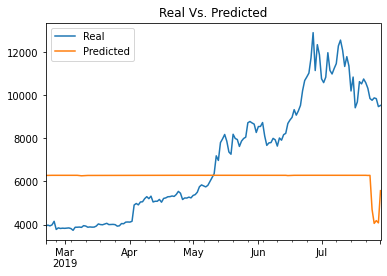

In [58]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Real Vs. Predicted")